<a href="https://colab.research.google.com/github/TheoKoess/Financement/blob/maxime-garnier/Projet_Moreau_equilibre_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting & dataviz

# Ceci est un test
# Ceci est le test deucième du nom 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
financement_df = pd.read_csv("/content/drive/MyDrive/financement.csv", sep=";")

## Préparation des données


Feature engineering

In [6]:
def resume_table(df):
    print("Format de la base : {}".format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"]).reset_index()
    summary["name"] = summary["index"]
    summary = summary[["name", "dtypes"]] # Correction : les colonnes doivent être spécifiées entre crochets
    summary["Missing"] = df.isnull().sum().values
    summary["Miss_percent"] = round((summary["Missing"] / len(df))*100, 2) # Correction : le calcul du pourcentage de valeurs manquantes doit être corrigé
    summary["Uniques"] = df.nunique().values
    summary["First Value"] = df.iloc[0].values
    summary["Second value"] = df.iloc[1].values
    summary["Third value"] = df.iloc[2].values
    return summary

In [7]:
resume_table(financement_df)

Format de la base : (378657, 15)


,name,dtypes,Missing,Miss_percent,Uniques,First Value,Second value,Third value
0,ID,int64,0,0.00,378657,1000002330,1000003930,1000004038
1,nom,object,4,0.00,375688,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?
2,categorie,object,870,0.23,159,Poetry,Narrative Film,Narrative Film
3,categorie_principale,object,870,0.23,15,Publishing,Film & Video,Film & Video
4,monaie,object,870,0.23,14,GBP,USD,USD
5,date_butoire,object,870,0.23,3164,09/10/2015,01/11/2017,26/02/2013
6,objectif,float64,870,0.23,8332,1000.0,30000.0,45000.0
7,lancement,object,870,0.23,346287,11/08/2015 12:12,02/09/2017 04:43,12/01/2013 00:20
8,promesse,float64,870,0.23,62072,0.0,2421.0,220.0
9,etat,object,870,0.23,3,0,0,0


In [11]:
financement_df['etat'] = financement_df['etat'].replace("successful",1)
financement_df['etat'] = financement_df['etat'].replace("live",1)
financement_df['etat'] = financement_df['etat'].replace("failed",0)
financement_df['etat'] = financement_df['etat'].replace("canceled",0)
financement_df['etat'] = financement_df['etat'].replace("suspended",0)
financement_df = financement_df.dropna(subset=['etat'])
financement_df = financement_df[financement_df['etat'] != 'undefined']
financement_df['etat'] = financement_df['etat'].astype(int)


<Axes: xlabel='etat', ylabel='count'>

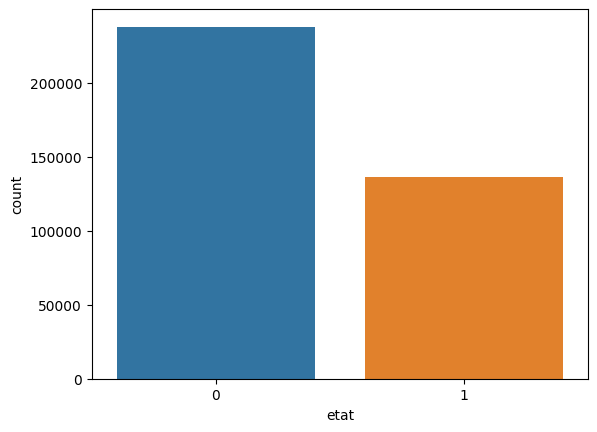

In [14]:
# Créer un graphique seaborn de comptage de fréquences
sns.countplot(x='etat', data=financement_df)